In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler

In [26]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [27]:
print(df.iloc[:,0:4].head())

   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [28]:
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df,columns=wine.feature_names)

In [5]:
print(df.iloc[:,0:4].describe())

            alcohol    malic_acid           ash  alcalinity_of_ash
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02
mean   7.841418e-15  2.444986e-16 -4.059175e-15      -7.110417e-17
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_model=pca.fit(df)
df_trans=pd.DataFrame(pca_model.transform(df), columns=['pca1', 'pca2'])

In [7]:
print(df_trans.head())

       pca1      pca2
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831


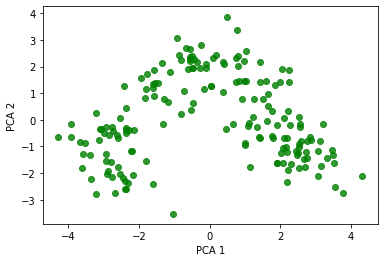

In [8]:
plt.scatter(df_trans['pca1'], df_trans['pca2'], alpha=0.8, color=["green"])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [9]:
comp=pd.DataFrame(pca_model.components_, columns=wine.feature_names)
print(comp)

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.394661    0.422934             -0.298533         0.313429   
1      -0.065040    0.003360             -0.028779        -0.039302   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.088617  0.296715                      0.376167  0.286752  
1        -0.529996  0.279235                      0.164496 -0.364903  


In [10]:
print(pca_model.explained_variance_ratio_)

[0.36198848 0.1920749 ]


In [11]:
pca = PCA()
pca_model=pca.fit(df)

In [12]:
print(pca_model.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [13]:
print(np.cumsum(pca_model.explained_variance_ratio_))

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


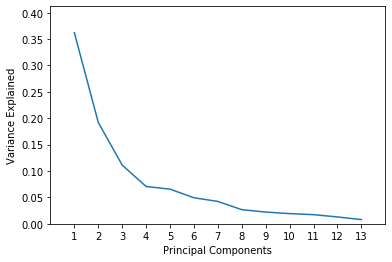

In [14]:
plt.plot(list(range(1,14)), pca.explained_variance_ratio_)
plt.axis([0, 14, 0, max(pca.explained_variance_ratio_)+0.05])
plt.xticks(list(range(1,14)))
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

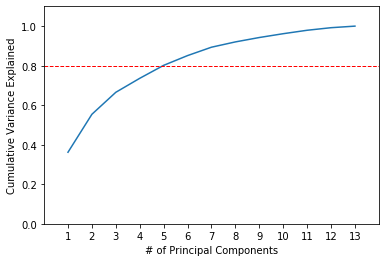

In [15]:
plt.plot(list(range(1,14)), np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, 14, 0, 1.1])
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
plt.xticks(list(range(1,14)))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [18]:
X = df.iloc[:,0:11].values
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.22488398,
         0.25171685,  0.36217728],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.54472099,
        -0.29332133,  0.40605066],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  2.13596773,
         0.26901965,  0.31830389],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -0.4220751 ,
         2.22423597, -1.61212515],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -0.22934584,
         1.83492299, -1.56825176],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -0.4220751 ,
         1.79166599, -1.52437837]])

In [19]:
y = df.iloc[:,11].values
y

array([ 1.84791957,  1.1134493 ,  0.78858745,  1.18407144,  0.44960118,
        0.33660575,  1.36768901,  1.36768901,  0.33660575,  1.32531572,
        0.78858745,  0.29423247,  0.40722789,  0.16711262,  0.54847218,
        0.37897904,  0.05411719, -0.05887823,  0.29423247,  1.05695159,
        1.55130658,  1.28294244,  1.96091499,  1.43831115,  1.70667528,
        0.83096074,  0.8592096 ,  0.22361033,  1.1134493 ,  1.38181344,
        0.13886376,  0.37897904,  0.36485461,  0.54847218,  0.36485461,
        1.2123203 ,  0.23773476, -0.1436248 ,  0.1106149 ,  1.29706687,
        1.08520045,  0.54847218,  1.33944015,  0.54847218,  1.04282716,
        1.01457831,  1.16994702,  1.01457831,  0.19536147,  0.68971646,
        0.42135232,  1.07107602,  0.91570731,  0.44960118,  0.83096074,
        0.59084546,  0.98632945,  0.32248133,  0.36485461, -1.11821035,
       -1.33007677, -1.44307219, -0.21424694,  0.36485461, -0.53910879,
       -0.44023779,  0.80271188,  1.22644473, -0.96284164,  0.64

In [24]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [29]:
df_n = normalize(df)

In [30]:
X_normalized = pd.DataFrame(df_n)

In [31]:
X_normalized.columns = df.columns
X_normalized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


In [32]:
# Building the OPTICS Clustering model 
df_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
df_model.fit(X_normalized) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [33]:
labels1 = cluster_optics_dbscan(reachability = df_model.reachability_,
                                core_distances = df_model.core_distances_, 
                                   ordering = df_model.ordering_, eps = 0.5) 

In [34]:
labels2 = cluster_optics_dbscan(reachability = df_model.reachability_, 
                                   core_distances = df_model.core_distances_, 
                                   ordering = df_model.ordering_, eps = 2) 

In [35]:
space = np.arange(len(X_normalized))

In [36]:
reachability = df_model.reachability_[df_model.ordering_] 

In [37]:
labels = df_model.labels_[df_model.ordering_]

In [38]:
print(labels) 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


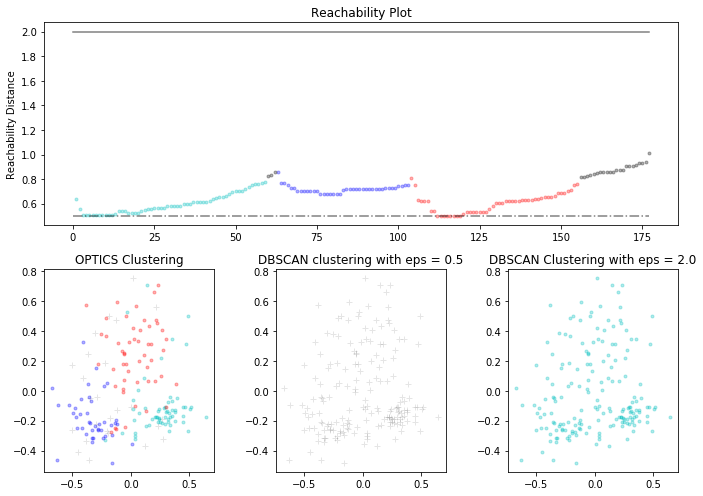

In [41]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_normalized[df_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_normalized.iloc[df_model.labels_ == -1, 0], 
        X_normalized.iloc[df_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_normalized[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_normalized.iloc[labels1 == -1, 0], 
        X_normalized.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_normalized.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_normalized.iloc[labels2 == -1, 0], 
        X_normalized.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 